<a href="https://colab.research.google.com/github/surekhagm16/MLProjects/blob/main/CustomerChurn_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('/content/sample_data/CustomerChurn.csv')

In [ ]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2138,6288-CHQJB,Female,0,Yes,Yes,54,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Two year,No,Bank transfer (automatic),69.95,3871.85,No
3324,5043-TRZWM,Female,0,No,No,1,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Electronic check,75.55,75.55,No
5303,9839-ETQOE,Male,0,No,Yes,43,No,No phone service,DSL,Yes,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,40.45,1912.85,No
6209,3417-TSCIC,Male,0,No,No,29,No,No phone service,DSL,No,...,No,No,No,No,One year,Yes,Mailed check,24.85,788.05,No
2925,2931-XIQBR,Female,0,Yes,Yes,50,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,No,Mailed check,103.05,5153.5,No


In [ ]:
# Data Analysis -> no use of customer ID for my model
df.drop('customerID', axis = 1, inplace = True)

In [ ]:
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [ ]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
# drop null values
df[pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()].shape


(11, 20)

In [ ]:
df1 = df[df.TotalCharges !=' ']
df1[df1['TotalCharges'].isnull() == True]
df1[df1.TotalCharges == '']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [ ]:
#convert the data type of Total charges to numerical
df1 ['TotalCharges']= pd.to_numeric(df1['TotalCharges'])
df1['TotalCharges'].dtype

<ipython-input-74-91bd7bb70937>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1 ['TotalCharges']= pd.to_numeric(df1['TotalCharges'])


dtype('float64')

In [ ]:
def get_uniquevalues(df):
  for col in df:
    if df[col].dtypes == 'object':
      print(col, df[col].unique())

In [ ]:
get_uniquevalues(df1)

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [ ]:
df1.replace('No internet service', 'No', inplace=True)

<ipython-input-82-59e788b262b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace=True)


In [ ]:
get_uniquevalues(df1)

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes']
OnlineBackup ['Yes' 'No']
DeviceProtection ['No' 'Yes']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [ ]:
df1.replace('No phone service', 'No', inplace=True)

<ipython-input-84-9c25d7abc358>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace=True)


In [ ]:
get_uniquevalues(df1)

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes']
OnlineBackup ['Yes' 'No']
DeviceProtection ['No' 'Yes']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [ ]:
for col in df1:
  if df[col].dtypes == 'object':
    if len(df1[col].unique()) == 2:
      df1[col].replace({'Yes':1, 'No':0}, inplace = True)

<ipython-input-110-e4baa4663a78>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes':1, 'No':0}, inplace = True)
<ipython-input-110-e4baa4663a78>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1, 'No':0}, inplace = True)
<ipython-input-110-e4baa4663a78>:4: FutureWarning: Downcasting behavior in `r

In [ ]:
for col in df1:
  if df[col].dtypes == 'object':
    if len(df1[col].unique()) == 2:
      print(col, df1[col].unique())

gender ['Female' 'Male']
Partner [1 0]
Dependents [0 1]
PhoneService [0 1]
MultipleLines [0 1]
OnlineSecurity [0 1]
OnlineBackup [1 0]
DeviceProtection [0 1]
TechSupport [0 1]
StreamingTV [0 1]
StreamingMovies [0 1]
PaperlessBilling [1 0]
Churn [0 1]


In [ ]:
get_uniquevalues(df1)

gender ['Female' 'Male']
InternetService ['DSL' 'Fiber optic' 'No']
Contract ['Month-to-month' 'One year' 'Two year']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [ ]:
df1['gender'].replace({'Female':1, 'Male':0}, inplace = True)

<ipython-input-116-0d55a7e00b11>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'].replace({'Female':1, 'Male':0}, inplace = True)
<ipython-input-116-0d55a7e00b11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1, 'Male':0}, inplace = True)


In [ ]:
get_uniquevalues(df1)

InternetService ['DSL' 'Fiber optic' 'No']
Contract ['Month-to-month' 'One year' 'Two year']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [ ]:
df2 = pd.get_dummies(data = df1, columns = ['InternetService','Contract','PaymentMethod'], dtype=int)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [ ]:
df2.info()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
col_to_scale = ['tenure', 'MonthlyCharges','TotalCharges']

In [ ]:
df2[col_to_scale] =scaler.fit_transform(df2[col_to_scale])

In [ ]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3605,0,0,0,0,0.464789,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
5226,0,0,1,1,0.154930,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1951,0,0,1,0,0.183099,1,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0


In [ ]:
df2.columns, df2['Churn'].unique()

(Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
        'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
        'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
        'InternetService_DSL', 'InternetService_Fiber optic',
        'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
        'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
        'PaymentMethod_Credit card (automatic)',
        'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
       dtype='object'),
 array([0, 1]))

In [ ]:
X = df2.drop('Churn', axis =1)
y = df2['Churn']
X.shape

(7032, 26)

In [ ]:
# Split the data for training and testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=42)
X_train.shape, X_test.shape

((5625, 26), (1407, 26))

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

SyntaxError: invalid syntax (<ipython-input-202-78bf07fdf115>, line 2)

In [ ]:
tf.random.set_seed(42)

In [ ]:
model = tf.keras.Sequential([
    layers.Dense(100, activation = 'relu'),
    layers.Dense(50, activation = 'relu'),
    layers.Dense(10, activation = 'relu'),
    layers.Dense(1, activation= 'linear')

])

In [ ]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.007),
              metrics =['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7595 - loss: 0.4674
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7947 - loss: 0.4156
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7946 - loss: 0.4112
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7969 - loss: 0.4084
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8012 - loss: 0.4036
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8013 - loss: 0.4001
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8072 - loss: 0.3959
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8042 - loss: 0.3929
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8087 - loss: 0.3877
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8065 - loss: 0.3854
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8090 - loss: 0.3794
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7418 - loss: 2.0818


[2.1093592643737793, 0.7455579042434692]

In [ ]:
y_pred = model.predict(X_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
y_test[15:20], y_pred[15:20]

(3257    0
 1976    1
 132     0
 5194    1
 1950    1
 Name: Churn, dtype: int64,
 array([[-0.8260801],
        [ 5.6114354],
        [-4.878633 ],
        [-0.9132018],
        [-2.6996005]], dtype=float32))

In [ ]:
tf.random.set_seed(42)

In [ ]:
model2 = tf.keras.Sequential([
    layers.Dense(100, activation = 'relu'),
    layers.Dense(10,activation = 'relu'),
    layers.Dense(1,activation= 'sigmoid')

])

In [ ]:
model2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics =['accuracy'])

In [ ]:
history_model2 = model2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7489 - loss: 0.5141
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8058 - loss: 0.4159
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8092 - loss: 0.4086
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8113 - loss: 0.4046
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8138 - loss: 0.4017
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8160 - loss: 0.3990
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8173 - loss: 0.3971
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8188 - loss: 0.3949
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8195 - loss: 0.3931
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8194 - loss: 0.3914
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8205 - loss: 0.3895
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
y_pred2 = model2.predict(X_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
y_test[15:20], y_pred[15:20], y_pred2[15:20]

(3257    0
 1976    1
 132     0
 5194    1
 1950    1
 Name: Churn, dtype: int64,
 array([[-0.27413386],
        [ 0.99184304],
        [-3.0208957 ],
        [-0.27413386],
        [-1.1917048 ]], dtype=float32),
 array([[0.02356427],
        [0.97703713],
        [0.04319827],
        [0.49455267],
        [0.129272  ]], dtype=float32))

In [ ]:
y_test.shape, y_pred.shape

((1407,), (1407, 1))

In [ ]:
def pred_value(ypredictions, threshold):
  pred = []
  for element in ypredictions:
    if element >threshold:
      pred.append(1)
    else:
      pred.append(0)

  return pred

In [ ]:
model1_pred = pred_value(y_pred, 0)
model2_pred = pred_value(y_pred2, 0.5)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(classification_report(y_test, model1_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1033
           1       0.64      0.42      0.51       374

    accuracy                           0.78      1407
   macro avg       0.73      0.67      0.69      1407
weighted avg       0.77      0.78      0.77      1407



In [ ]:
print(classification_report(y_test, model2_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1033
           1       0.56      0.47      0.51       374

    accuracy                           0.76      1407
   macro avg       0.69      0.67      0.68      1407
weighted avg       0.75      0.76      0.75      1407



Text(0.5, 1.0, 'Model1- Confusion Matrix')

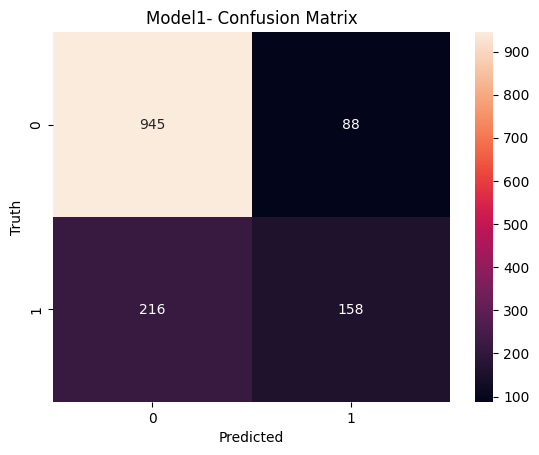

In [ ]:
cm_model1 = confusion_matrix(y_test, model1_pred)
import seaborn as sns
sns.heatmap(cm_model1, annot= True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Model1- Confusion Matrix')

Text(0.5, 1.0, 'Model2- Confusion Matrix')

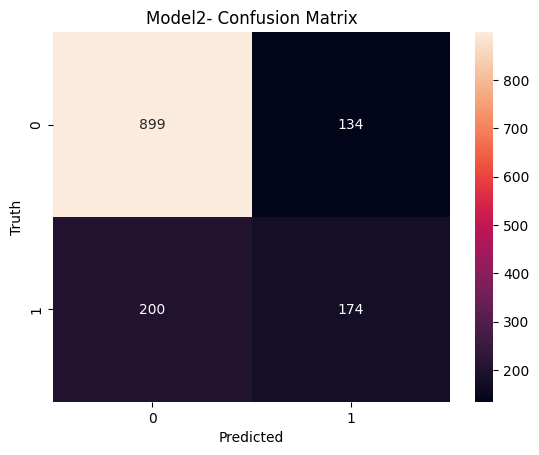

In [ ]:
cm_model2 = confusion_matrix(y_test, model2_pred)
import seaborn as sns
sns.heatmap(cm_model2, annot= True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Model2- Confusion Matrix')